#  Tarea Semanal 3

### Matias Celada 

##### 07/05

In [9]:
from IPython.display import IFrame
IFrame("./TS3_V3.pdf", width=1000, height=1000)

### Simulación Numerica

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS

from pytc2.general import print_subtitle


In [5]:
def sim_aprox(aproxs, orders2analyze, ripple, attenuation):

    all_sys = []
    filter_names = []

    for (this_aprox, this_order, this_ripple, this_att) in zip(aproxs, orders2analyze, ripple, attenuation):

        if this_aprox == 'Butterworth':

            z,p,k = sig.buttap(this_order)

            eps = np.sqrt( 10**(this_ripple/10) - 1 )
            num, den = sig.zpk2tf(z,p,k)
            num, den = sig.lp2lp(num, den, eps**(-1/this_order))

            z,p,k = sig.tf2zpk(num, den)

        elif this_aprox == 'Chebyshev1':

            z,p,k = sig.cheb1ap(this_order, this_ripple)

        elif this_aprox == 'Chebyshev2':

            z,p,k = sig.cheb2ap(this_order, this_att)

        elif this_aprox == 'Bessel':

            z,p,k = sig.besselap(this_order, norm='delay')

        elif this_aprox == 'Cauer':

            z,p,k = sig.ellipap(this_order, this_ripple, this_att)


        num, den = sig.zpk2tf(z,p,k)

        
        all_sys.append(sig.TransferFunction(num,den))

        this_label = this_aprox + '_ord_' + str(this_order) + '_rip_' + str(this_ripple)+ '_att_' + str(this_att)
        
        print_subtitle(this_label)
        # factorizamos en SOS's
        this_sos = tf2sos_analog(num, den)
        
        pretty_print_SOS(this_sos, mode='omegayq')
        
        filter_names.append(this_label)
        

    analyze_sys( all_sys, filter_names )

#### Butterworth_ord_3_rip_1_att_12

<IPython.core.display.Math object>

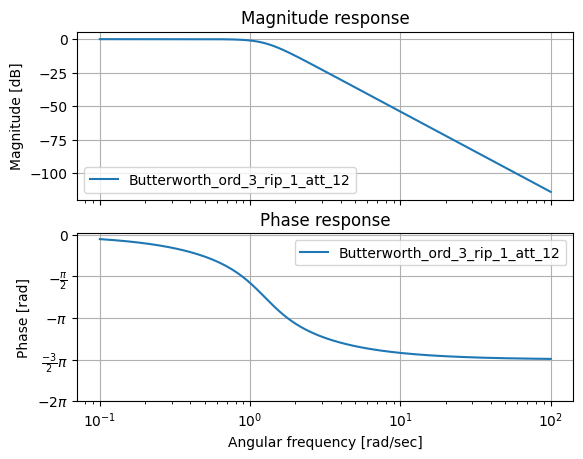

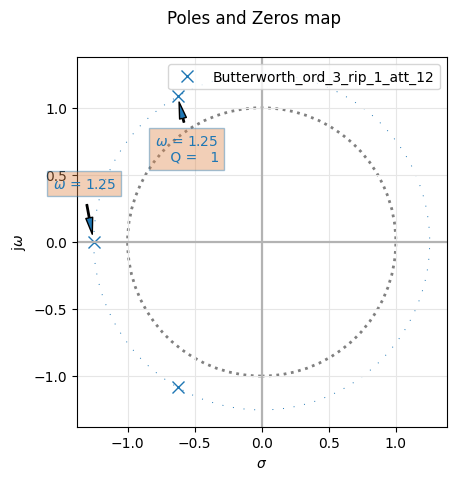

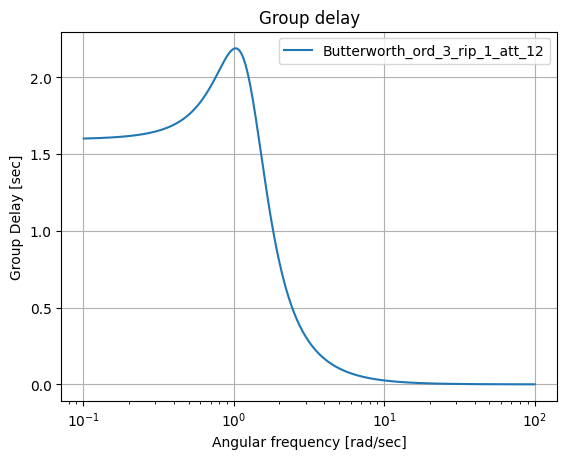

In [8]:
ee = 0.259
n = 3
aprox_name = 'Butterworth'

ripple = [1]

aproxs = [aprox_name] * len(orders2analyze)
orders2analyze = [n] * len(orders2analyze)
attenuation = [12] * len(orders2analyze)

sim_aprox(aproxs, orders2analyze, ripple, attenuation)


### Simulación Punto 5 

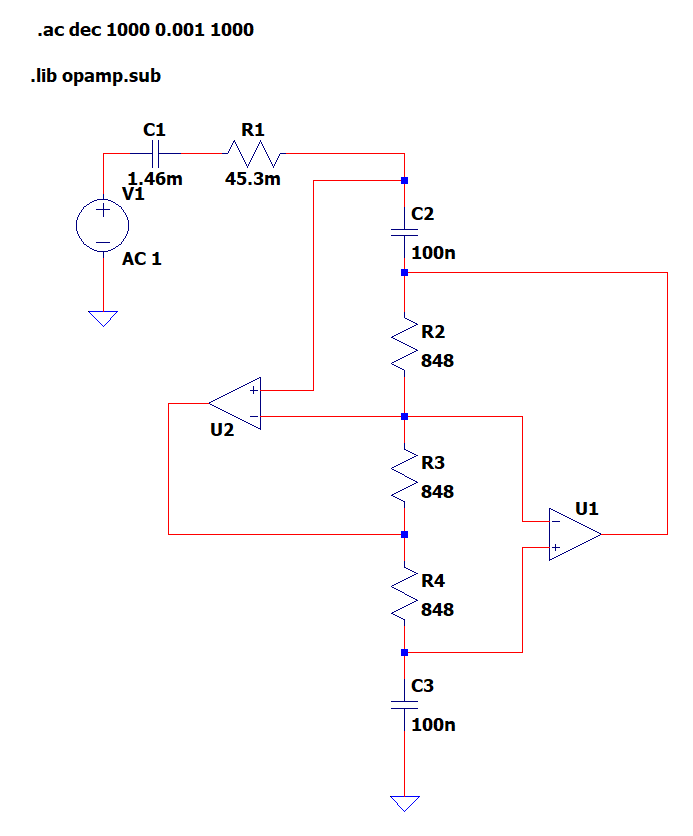

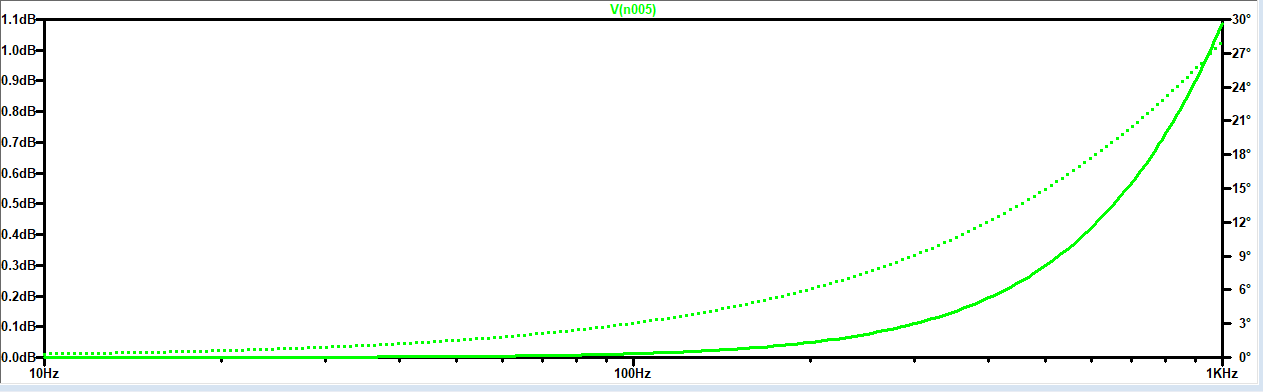

Vemos que la grafica que nos arroja LT Spice se corresponde con la plantilla. El circuito es correcto.